# Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 


From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).



# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. 

The number of rings is the value to predict:either as a continuous value or as a classification problem. 

Name / Data Type / Measurement Unit / Description 
----------------------------- 
Sex / nominal / -- / M, F, and I (infant) 


Length / continuous / mm / Longest shell measurement 


Diameter	/ continuous / mm / perpendicular to length 


Height / continuous / mm / with meat in shell 


Whole weight / continuous / grams / whole abalone 


Shucked weight / continuous	/ grams / weight of meat 


Viscera weight / continuous / grams / gut weight (after bleeding) 


Shell weight / continuous / grams / after being dried 


Rings / integer / -- / +1.5 gives the age in years 


The readme file contains attribute statistics.



In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("abalone.csv",header=None,names=['Gender','Length','Diameter','Height','Weight','MeatWeight','GutWeight','ShellWeight','Rings'])

In [3]:
df.head()

Gender  Length  Diameter  Height  Weight  MeatWeight  GutWeight  \
0      M   0.455     0.365   0.095  0.5140      0.2245     0.1010   
1      M   0.350     0.265   0.090  0.2255      0.0995     0.0485   
2      F   0.530     0.420   0.135  0.6770      0.2565     0.1415   
3      M   0.440     0.365   0.125  0.5160      0.2155     0.1140   
4      I   0.330     0.255   0.080  0.2050      0.0895     0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

In [4]:
df['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [5]:
df_rows , df_cols = df.shape
print(df_rows)
print(df_cols)

4177
9


In [6]:
df2 = df.loc[:, 'Length':'Rings']

In [7]:
df2.head()

Length  Diameter  Height  Weight  MeatWeight  GutWeight  ShellWeight  Rings
0   0.455     0.365   0.095  0.5140      0.2245     0.1010        0.150     15
1   0.350     0.265   0.090  0.2255      0.0995     0.0485        0.070      7
2   0.530     0.420   0.135  0.6770      0.2565     0.1415        0.210      9
3   0.440     0.365   0.125  0.5160      0.2155     0.1140        0.155     10
4   0.330     0.255   0.080  0.2050      0.0895     0.0395        0.055      7

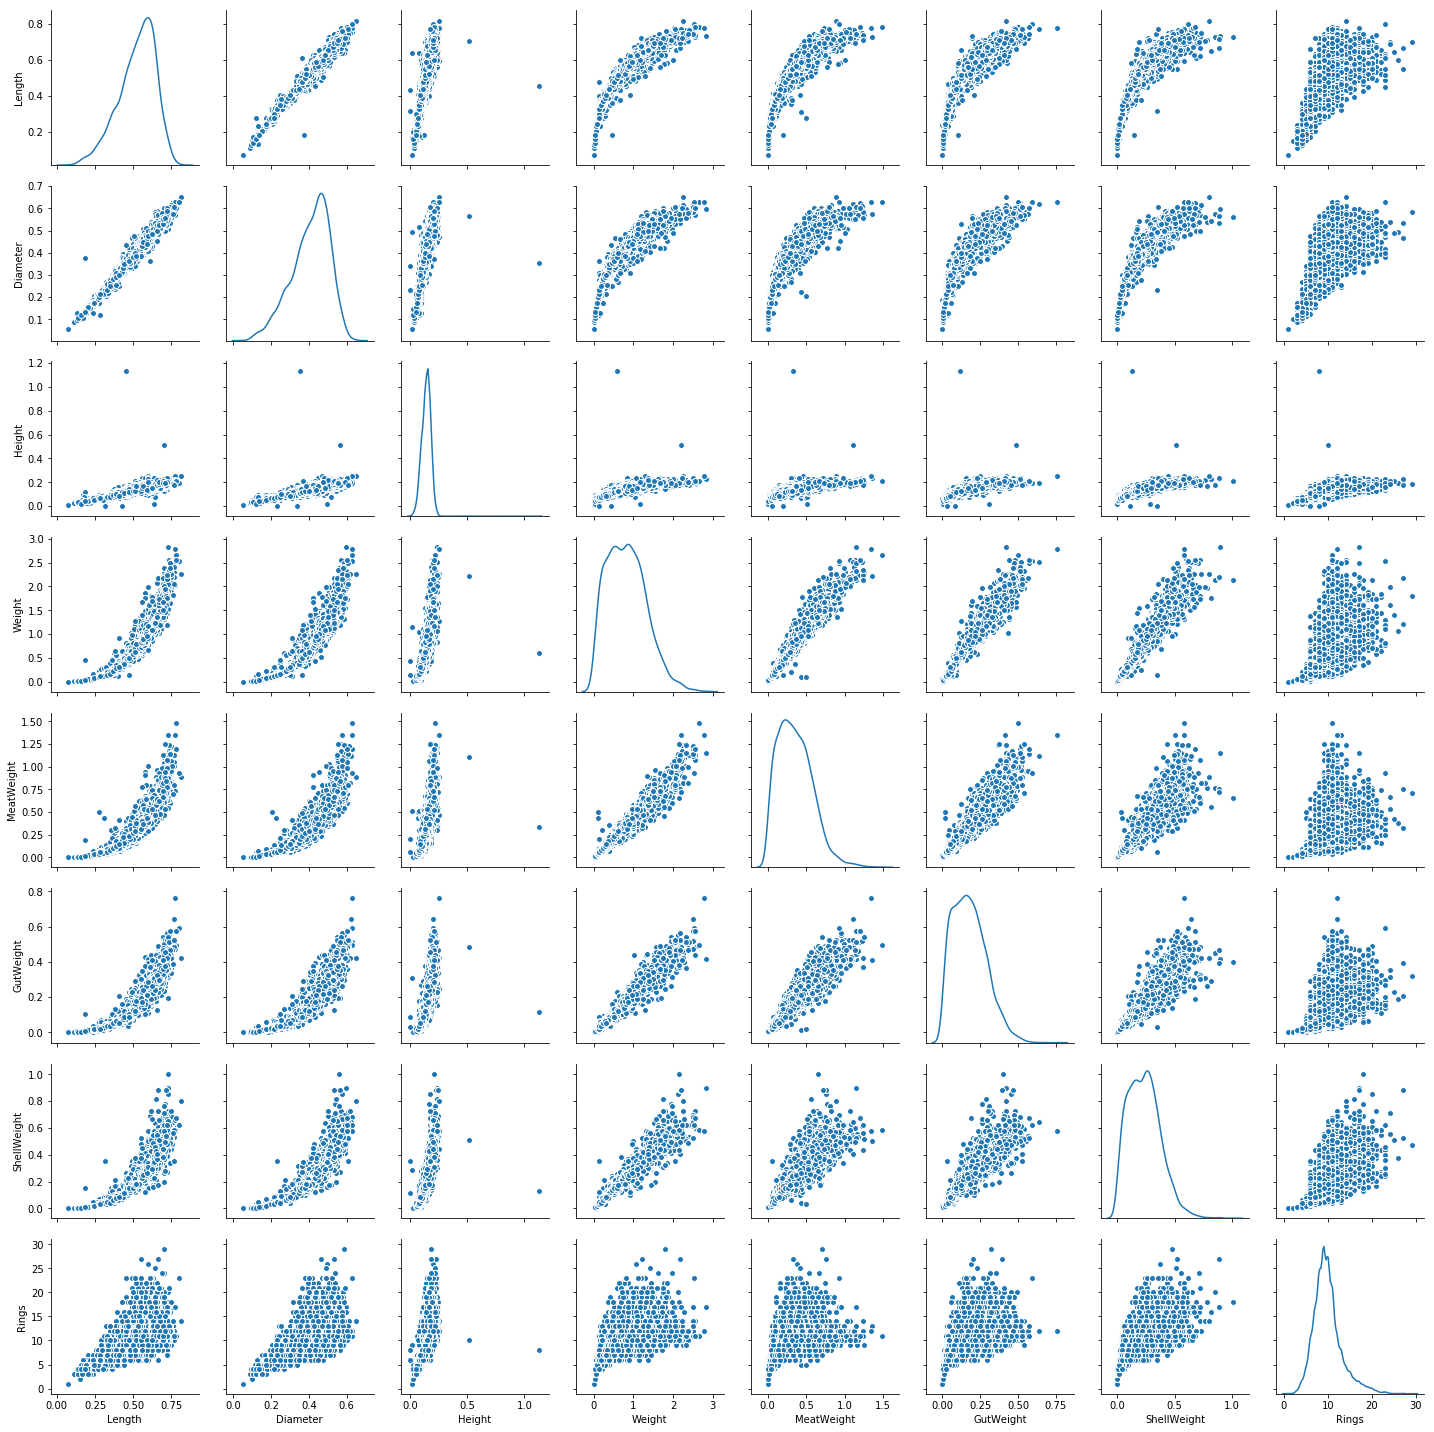

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [9]:
df_scaled = df2.apply(zscore)# scaling the data


In [10]:
df_scaled.head().T


0         1         2         3         4
Length      -0.574558 -1.448986  0.050033 -0.699476 -1.615544
Diameter    -0.432149 -1.439929  0.122130 -0.432149 -1.540707
Height      -1.064424 -1.183978 -0.107991 -0.347099 -1.423087
Weight      -0.641898 -1.230277 -0.309469 -0.637819 -1.272086
MeatWeight  -0.607685 -1.170910 -0.463500 -0.648238 -1.215968
GutWeight   -0.726212 -1.205221 -0.356690 -0.607600 -1.287337
ShellWeight -0.638217 -1.212987 -0.207139 -0.602294 -1.320757
Rings        1.571544 -0.910013 -0.289624  0.020571 -0.910013

In [11]:

df_scaled.iloc[:, 1].T

0      -0.432149
1      -1.439929
2       0.122130
3      -0.432149
4      -1.540707
5      -1.087206
6       0.071741
7       0.172519
8      -0.381760
9       0.323686
10     -0.280982
11     -0.583316
12     -0.280982
13     -0.029037
14     -0.532927
15     -0.079426
16     -1.288762
17     -0.684094
18     -1.137595
19     -0.885650
20     -1.288762
21     -1.339151
22      0.323686
23      0.071741
24      0.726798
25      0.323686
26      0.424464
27      0.374075
28      0.676409
29      0.172519
          ...   
4147    1.432245
4148    1.986524
4149   -1.943819
4150   -1.792652
4151   -1.591096
4152   -1.288762
4153   -0.936039
4154   -0.784872
4155   -0.583316
4156   -0.381760
4157   -0.482538
4158   -0.532927
4159    0.323686
4160    0.676409
4161    0.474853
4162   -1.540707
4163   -0.986428
4164   -1.187984
4165   -1.087206
4166   -0.432149
4167   -0.280982
4168   -0.079426
4169   -0.230593
4170    0.222908
4171    0.222908
4172    0.424464
4173    0.323686
4174    0.6764

In [12]:
model = KMeans(n_clusters = 3)# enter model have enter data cluster = 3 beacuase the gender is 3 variables

In [13]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
cluster_range = range( 1, 7 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )# inertia calculte the variance and sum of squre error
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             1    33416.000000
1             2    14612.656454
2             3     9922.858144
3             4     7867.534463
4             5     6799.228739
5             6     5837.305221

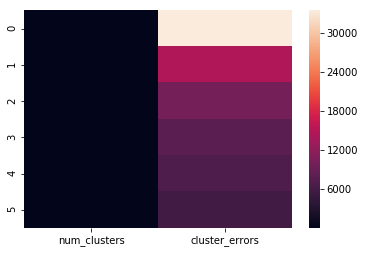

In [15]:
sns.heatmap(clusters_df)

The total sum of squared distances of every data point from respective centroid is also called inertia. 

Let us print the inertia value for all K values. 

That K at which the inertia stop to drop significantly (elbow method) will be the best K.

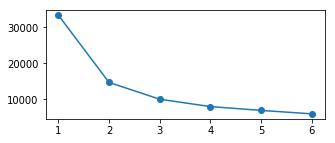

In [16]:
# Elbow plot

plt.figure(figsize=(5,2))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [17]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [18]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [19]:
centroids = kmeans.cluster_centers_# only we can check the magnitute
# k means is the my model

In [20]:
centroids# this centroide we creating the data frames

array([[-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
        -1.11591049, -1.1283335 , -0.85717476],
       [ 1.03608988,  1.04187408,  0.98130211,  1.22176997,  1.17823769,
         1.19808871,  1.17676949,  0.62065252],
       [ 0.13570472,  0.13223651,  0.06955548, -0.08492905, -0.09047204,
        -0.0829803 , -0.06004439,  0.14255146]])

In [21]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) ) # and we rename the columns

In [22]:
centroid_df# we need to check the centroide values

Length  Diameter    Height    Weight  MeatWeight  GutWeight  ShellWeight  \
0 -1.277100 -1.277873 -1.120858 -1.137503   -1.084084  -1.115910    -1.128333   
1  1.036090  1.041874  0.981302  1.221770    1.178238   1.198089     1.176769   
2  0.135705  0.132237  0.069555 -0.084929   -0.090472  -0.082980    -0.060044   

      Rings  
0 -0.857175  
1  0.620653  
2  0.142551

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

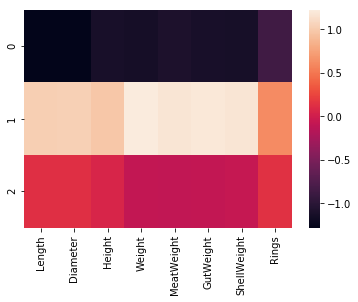

In [23]:
sns.heatmap(centroid_df)# cluster 0 is the 

In [24]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

df_labels.T

0     1     2     3     4     5     6     7     8     9     ...   \
labels     2     0     2     2     0     0     2     2     2     2  ...    

        4167  4168  4169  4170  4171  4172  4173  4174  4175  4176  
labels     2     2     2     2     2     2     2     1     1     1  

[1 rows x 4177 columns]

In [25]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
snail_df_labeled = df2.join(df_labels)
snail_df_labeled.T

0       1       2       3       4       5       6       7     \
Length        0.455    0.35    0.53    0.44    0.33   0.425    0.53   0.545   
Diameter      0.365   0.265    0.42   0.365   0.255     0.3   0.415   0.425   
Height        0.095    0.09   0.135   0.125    0.08   0.095    0.15   0.125   
Weight        0.514  0.2255   0.677   0.516   0.205  0.3515  0.7775   0.768   
MeatWeight   0.2245  0.0995  0.2565  0.2155  0.0895   0.141   0.237   0.294   
GutWeight     0.101  0.0485  0.1415   0.114  0.0395  0.0775  0.1415  0.1495   
ShellWeight    0.15    0.07    0.21   0.155   0.055    0.12    0.33    0.26   
Rings            15       7       9      10       7       8      20      16   
labels            2       0       2       2       0       0       2       2   

               8       9      ...      4167    4168    4169    4170    4171  \
Length        0.475    0.55   ...       0.5   0.515    0.52    0.55    0.56   
Diameter       0.37    0.44   ...      0.38     0.4   0.385    0.43    0.43   
Height        0.125    0.15   ...     0.125   0.125   0.165    0.13   0.155   
Weight       0.5095  0.8945   ...     0.577   0.615   0.791  0.8395  0.8675   
MeatWeight   0.2165  0.3145   ...     0.269  0.2865   0.375  0.3155     0.4   
GutWeight    0.1125   0.151   ...    0.1265   0.123    0.18  0.1955   0.172   
ShellWeight   0.165    0.32   ...    0.1535  0.1765  0.1815  0.2405   0.229   
Rings             9      19   ...         9       8      10      10       8   
labels            2       2   ...         2       2       2       2       2   

              4172    4173    4174    4175    4176  
Length       0.565    0.59     0.6   0.625    0.71  
Diameter      0.45    0.44   0.475   0.485   0.555  
Height       0.165   0.135   0.205    0.15   0.195  
Weight       0.887   0.966   1.176  1.0945  1.9485  
MeatWeight    0.37   0.439  0.5255   0.531  0.9455  
GutWeight    0.239  0.2145  0.2875   0.261  0.3765  
ShellWeight  0.249  0.2605   0.308   0.296   0.495  
Rings           11      10       9      10      12  
labels           2       2       1       1       1  

[9 rows x 4177 columns]

In [27]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis.T

0       1       2       3       4       5       6       7     \
Length        0.455    0.35    0.53    0.44    0.33   0.425    0.53   0.545   
Diameter      0.365   0.265    0.42   0.365   0.255     0.3   0.415   0.425   
Height        0.095    0.09   0.135   0.125    0.08   0.095    0.15   0.125   
Weight        0.514  0.2255   0.677   0.516   0.205  0.3515  0.7775   0.768   
MeatWeight   0.2245  0.0995  0.2565  0.2155  0.0895   0.141   0.237   0.294   
GutWeight     0.101  0.0485  0.1415   0.114  0.0395  0.0775  0.1415  0.1495   
ShellWeight    0.15    0.07    0.21   0.155   0.055    0.12    0.33    0.26   
Rings            15       7       9      10       7       8      20      16   
labels            2       0       2       2       0       0       2       2   

               8       9      ...      4167    4168    4169    4170    4171  \
Length        0.475    0.55   ...       0.5   0.515    0.52    0.55    0.56   
Diameter       0.37    0.44   ...      0.38     0.4   0.385    0.43    0.43   
Height        0.125    0.15   ...     0.125   0.125   0.165    0.13   0.155   
Weight       0.5095  0.8945   ...     0.577   0.615   0.791  0.8395  0.8675   
MeatWeight   0.2165  0.3145   ...     0.269  0.2865   0.375  0.3155     0.4   
GutWeight    0.1125   0.151   ...    0.1265   0.123    0.18  0.1955   0.172   
ShellWeight   0.165    0.32   ...    0.1535  0.1765  0.1815  0.2405   0.229   
Rings             9      19   ...         9       8      10      10       8   
labels            2       2   ...         2       2       2       2       2   

              4172    4173    4174    4175    4176  
Length       0.565    0.59     0.6   0.625    0.71  
Diameter      0.45    0.44   0.475   0.485   0.555  
Height       0.165   0.135   0.205    0.15   0.195  
Weight       0.887   0.966   1.176  1.0945  1.9485  
MeatWeight    0.37   0.439  0.5255   0.531  0.9455  
GutWeight    0.239  0.2145  0.2875   0.261  0.3765  
ShellWeight  0.249  0.2605   0.308   0.296   0.495  
Rings           11      10       9      10      12  
labels           2       2       1       1       1  

[9 rows x 4177 columns]

In [28]:
snail_df_labeled['labels'].value_counts()   #0-Infant, 1-Female, 2-Male

2    1773
1    1224
0    1180
Name: labels, dtype: int64

In [29]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0.92,'3D plot of KMeans Clustering')

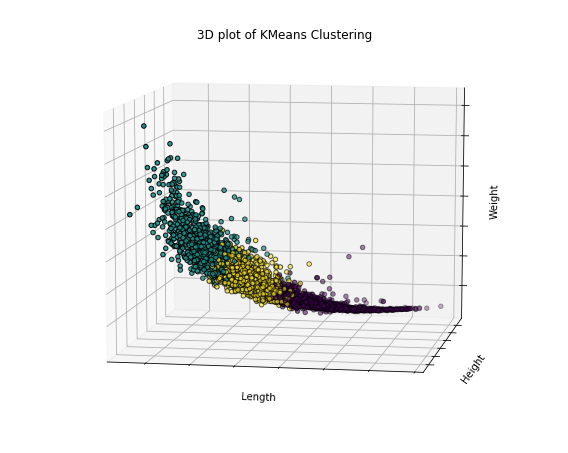

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 4],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

